In [4]:
# Import essential Python libraries for data analysis and visualization

import pandas as pd         # For handling tabular data (rows & columns)
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns       # For advanced, beautiful charts
from scipy import stats     # For statistics and z-scores
import plotly.express as px # For interactive charts

# Make visuals look better
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

print("✅ Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


In [5]:
# Load Benin dataset (change file path to yours)
df = pd.read_csv("../data/benin-malanville.csv")

# Preview first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
# Summary statistics
df.describe()

# Check missing values
missing_report = df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100
pd.DataFrame({"Missing Count": missing_report, "Missing %": missing_percent}).sort_values(by="Missing %", ascending=False)


,Missing Count,Missing %
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [7]:
# Choose columns to check
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute z-scores
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))

# Flag rows with extreme outliers
outliers = (z_scores > 3).sum()
outliers


np.int64(10526)

In [8]:
# Remove outliers (optional, if too many)
df_clean = df[(z_scores < 3).all(axis=1)]

# Fill missing values with median
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

# Verify cleaning
df_clean.isna().sum().sum()


np.int64(517860)

In [9]:
df_clean.to_csv("../data/benin_clean.csv", index=False)


c:\Users\user\Desktop\week0\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


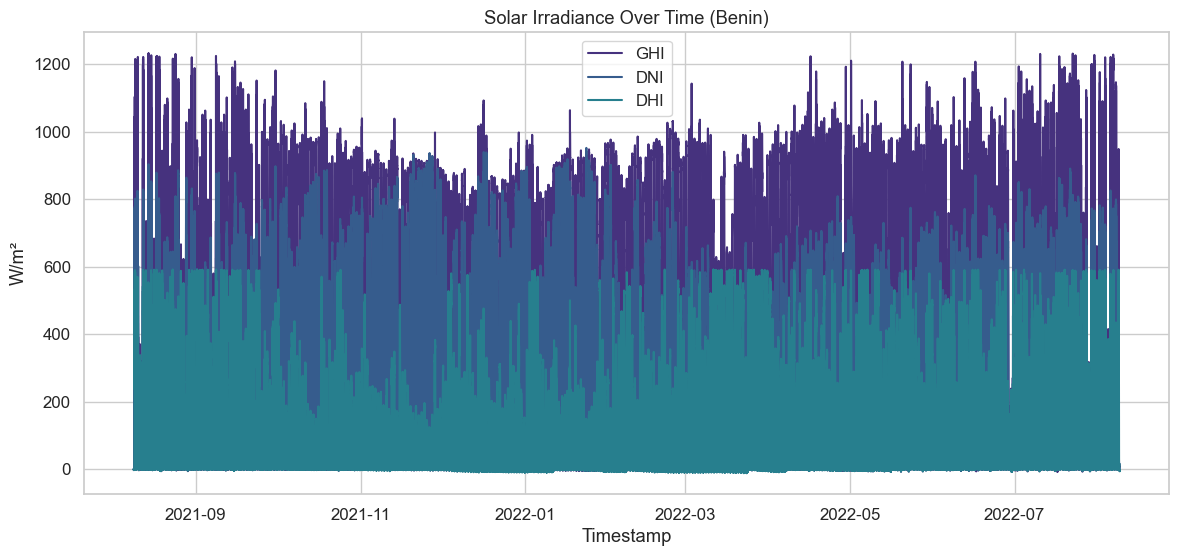

In [10]:
# Convert Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Plot GHI, DNI, DHI over time
plt.figure(figsize=(14,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.legend()
plt.title("Solar Irradiance Over Time (Benin)")
plt.xlabel("Timestamp")
plt.ylabel("W/m²")
plt.show()


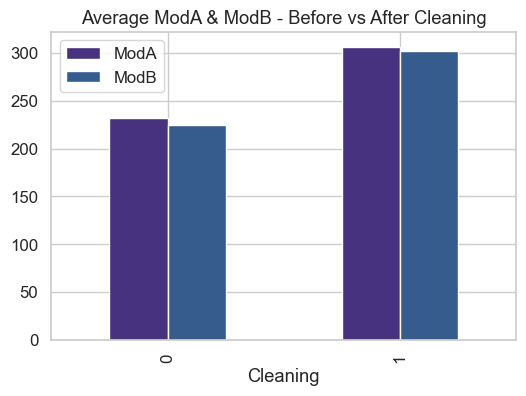

In [11]:
# Compare module performance before and after cleaning
cleaning_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_avg.plot(kind='bar', figsize=(6,4))
plt.title("Average ModA & ModB - Before vs After Cleaning")
plt.show()


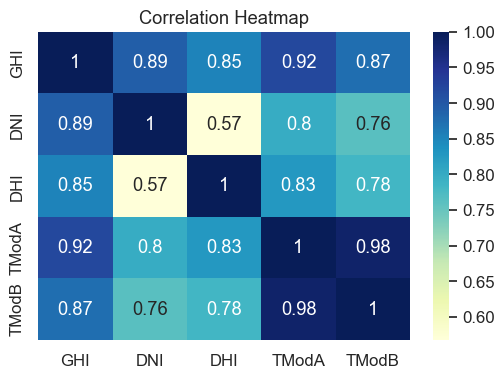

In [12]:
corr = df_clean[['GHI','DNI','DHI','TModA','TModB']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


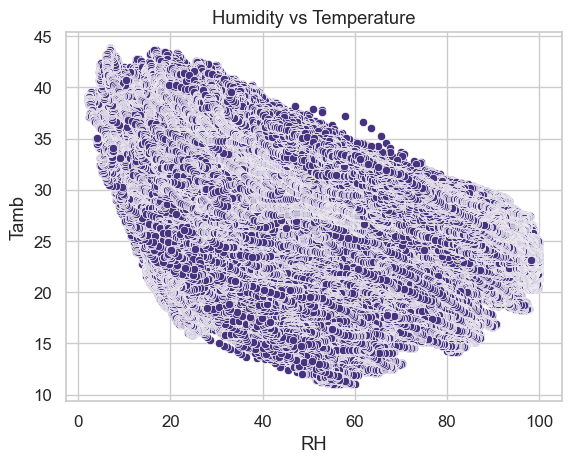

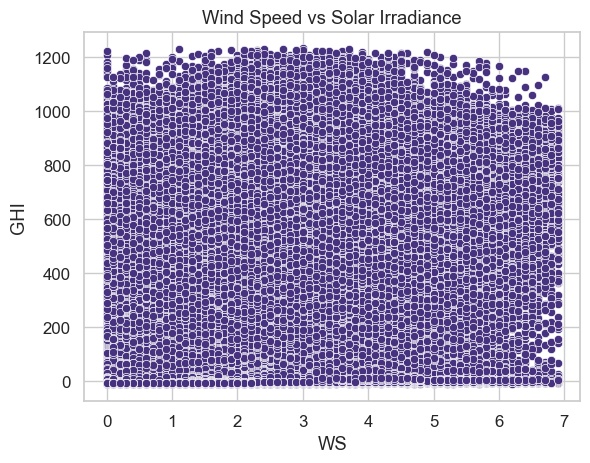

In [13]:
# Scatter plots
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Humidity vs Temperature")
plt.show()

sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs Solar Irradiance")
plt.show()


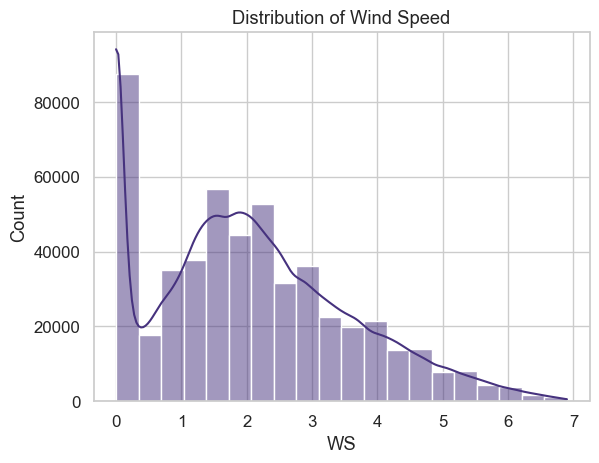

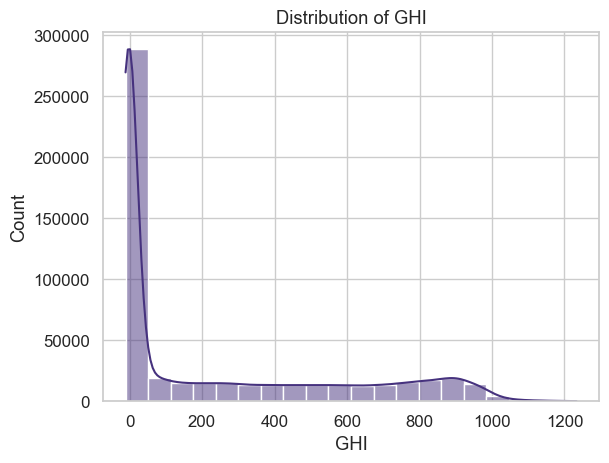

In [14]:
# Wind speed histogram
sns.histplot(df_clean['WS'], bins=20, kde=True)
plt.title("Distribution of Wind Speed")
plt.show()

# GHI distribution
sns.histplot(df_clean['GHI'], bins=20, kde=True)
plt.title("Distribution of GHI")
plt.show()


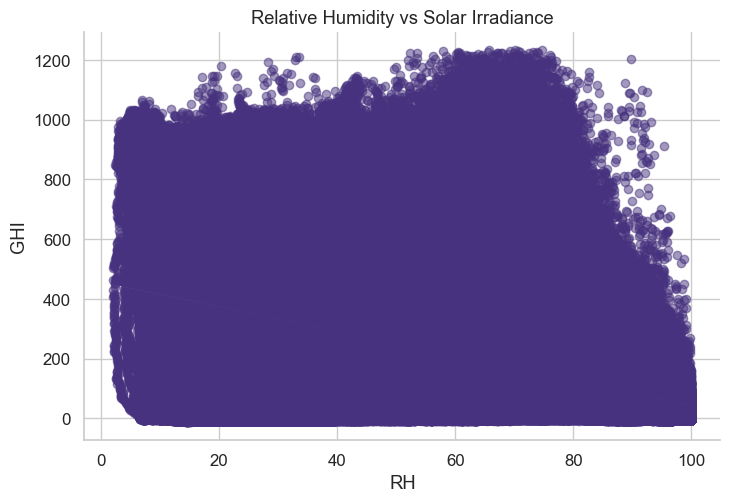

In [15]:
sns.lmplot(x='RH', y='GHI', data=df_clean, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Relative Humidity vs Solar Irradiance")
plt.show()


In [ ]:
fig = px.scatter(df_clean,
                 x='Tamb',
                 y='GHI',
                 size='RH',
                 color='BP',
                 title='GHI vs Temperature (Bubble size = RH, color = BP)')
fig.show()
